# 1. Modelo de precios hedónicos (OLS)

## 1.1. Obtención y limpieza de datos

Primero vamos a cargar las librerías que usaremos para elaborar un modelo de precios hedónicos (OLS), y con ello la base de datos que compartió Carlos.

In [1]:
import pandas as pd #permite manipular los dataframes, que serían el equivalente a los Excel
import numpy as np #en caso se necesiten cálculos numéricos, como p. ej. encontrar valores nulos 
import pyreadstat #para cargar datos que vienen de SPSS
import statsmodels.api as sm #para elaborar modelos OLS

base=pd.read_spss('rawdata/BDDHabitaclia_4043_join.sav')
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4043 entries, 0 to 4042
Columns: 203 entries, OBJECTID_1 to EPC_G_emision_2023
dtypes: category(1), float64(189), object(13)
memory usage: 6.2+ MB


Reviso los nombres de las columnas

In [2]:
print(base.columns.tolist())

['OBJECTID_1', 'codigo_inmueble1', 'Title', 'Type_build', 'Type_opera', 'Link', 'Location', 'Lat_X', 'Lon_Y', 'Climatic_Z', 'Nom_Mun', 'precio_eur', 'superficie', 'superficie_2', 'Unit_price', 'Ln_total_pr', 'Ln_unit_pr', 'numero_habitaciones', 'numero_bano', 'ratio_bano_hab', 'numero_aseo', 'ascensor', 'interac_planta', 'numero_de_piso', 'anyo_constr', 'anyo_constr_ponderad', 'antig_ponderad', 'Inverse_Age', 'Year_Before_1981', 'Year_1982_2006', 'Year_After_2007', 'superficie_terraza_m2', 'grand_terr_20m2', 'superficie_jardin_m2', 'superficie_salon', 'bool_despacho', 'bool_buhardilla', 'bool_trastero', 'bool_lavadero', 'bool_piscina_comunitaria', 'bool_jardin_comunitario', 'bool_amueblado', 'bool_ascensor', 'descripcion', 'bool_aire_acondicionado', 'bool_calefaccion', 'bool_chimenea', 'texto_destacado', 'Description', 'calificacion_consumo_letra', 'calificacion_consumo_valor', 'calificacion_emision_letra', 'calificacion_emision_valor', 'Dum_EPC', 'EPC_A_emision', 'EPC_B_emision', 'EPC

En su modelo, Carlos usa las siguientes variables.

In [9]:
# Seleccionar las columnas especificadas
selected_columns = ['Ln_total_pr', 'EPC_C_emision', 'EPC_F_emision', 'EPC_B_emision', 'EPC_A_emision', 'EPC_D_emision', 
                    'EPC_G_emision', 'EPC_E_emision', 'superficie', 'CT_renta_alta_CPA', 'superficie_2', 
                    'bool_ascensor', 'bool_piscina_comunitaria', 'bool_calefaccion', 
                    'desplaz_ponderado', 'Income_Household_2016', 'FIRE_pr', 'FAC1_1', 'FAC2_1', 
                    'grand_terr_20m2', 'Year_After_2007', 'CT_renta_meda_CPA', 'DP2e', 'dum_mar_200m', 
                    'bool_aire_acondicionado', 'Precio_red', 'ratio_bano_hab', 'Year_1982_2006', 'opin_ruido_si_pr', 
                    'Dist_CBD2', 'H_tamaviv', 'interac_planta']

#FAC1_1 y FAC2_1 hacen referencia a 'Estado_contemporaneidad_calidad' y 'Ausencia_singulares_presencia_arm_cocina'

# Seleccionar las columnas y ordenarlas alfabéticamente para que los resultados sean como
# el Excel de Carlos
bdd = base[selected_columns].sort_index(axis=1)

# Muestra el DataFrame resultante
bdd.head()

,CT_renta_alta_CPA,CT_renta_meda_CPA,DP2e,Dist_CBD2,EPC_A_emision,EPC_B_emision,EPC_C_emision,EPC_D_emision,EPC_E_emision,EPC_F_emision,...,bool_calefaccion,bool_piscina_comunitaria,desplaz_ponderado,dum_mar_200m,grand_terr_20m2,interac_planta,opin_ruido_si_pr,ratio_bano_hab,superficie,superficie_2
0,0.179265,0.629695,14.304224,3.143035,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,27.187629,0.0,1.0,2.0,43.530314,1.000000,86.0,7396.0
1,-0.400132,0.678419,9.873995,3.868774,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,26.831497,0.0,0.0,3.0,41.376779,0.666667,97.0,9409.0
2,-0.763527,0.215970,11.400419,4.517012,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,27.542064,0.0,0.0,-3.0,36.155690,0.666667,77.0,5929.0
3,-0.520908,0.403254,11.540736,3.539149,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,27.909746,0.0,0.0,2.0,36.451325,0.500000,95.0,9025.0
4,-0.069044,1.017454,11.120200,5.277817,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,24.657258,0.0,0.0,2.0,41.172813,0.750000,163.0,26569.0


Luego, hizo un filtro para eliminar outliers tomando en consideración la media y la desviación estándar.

In [4]:
df = bdd[(bdd['Ln_total_pr'] >= 11.2842035426135) & (bdd['Ln_total_pr'] <= 13.8409882055083)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3859 entries, 0 to 4042
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CT_renta_alta_CPA         3859 non-null   float64
 1   CT_renta_meda_CPA         3859 non-null   float64
 2   DP2e                      3859 non-null   float64
 3   Dist_CBD2                 3859 non-null   float64
 4   EPC_A_emision             3859 non-null   float64
 5   EPC_B_emision             3859 non-null   float64
 6   EPC_C_emision             3859 non-null   float64
 7   EPC_D_emision             3859 non-null   float64
 8   EPC_E_emision             3859 non-null   float64
 9   EPC_F_emision             3859 non-null   float64
 10  EPC_G_emision             3859 non-null   float64
 11  FAC1_1                    3859 non-null   float64
 12  FAC2_1                    3859 non-null   float64
 13  FIRE_pr                   3859 non-null   float64
 14  H_tamaviv    

Los resultados nos muestran que hay 3859 observaciones y no hay valores nulos (noten los *non-null*). Sin embargo, cuando a continuación intento hacer el modelo de precios hedónicos, me sale un mensaje de que existen filas vacías (en Python se les conoce como valores *NaN*-Not a Number). A veces pasan esas cosas, y diferenciar entre un valor *null* y un *NaN* suele ser complejo para quienes no venimos del mundo de la programación.

Para no hacernos problemas, el primer paso es eliminar aquellas filas vacías. A continuación, identificamos las variables independientes o **explicativas** (**X**) y la dependiente o **a explicar** (**Y**), y corremos el modelo.

## 1.2. Elaboración del modelo

In [5]:
# Eliminar filas con valores infinitos o NaN en las variables independientes (X) y dependiente (y)
df = df.replace([np.inf, -np.inf], np.nan).dropna()  #Me he dado cuenta que hay filas vacías, las elimino.

# Definir las variables independientes (X) y dependiente (y)
X_olsC = df.drop('Ln_total_pr', axis=1)  # Todas las columnas excepto 'Ln_total_pr'
y_olsC = df['Ln_total_pr']  # Columna 'Ln_total_pr'

# Agregar una constante (Beta) a la matriz X para el término de intercepción del modelo
X_olsC = sm.add_constant(X_olsC) #'sm' es la librería 'statsmodels' que cargamos al inicio. Ya
                            #está configurada para que 'sepa' qué tiene que hacer

# Crear el modelo de regresión lineal
olsC = sm.OLS(y_olsC, X_olsC) #noten que seguimos pidiendole que use 'sm' 

# Ajustar el modelo a los datos
results = olsC.fit()

# Imprimir el resumen del modelo
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            Ln_total_pr   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     901.0
Date:                Wed, 07 Feb 2024   Prob (F-statistic):               0.00
Time:                        18:02:01   Log-Likelihood:                 929.80
No. Observations:                3852   AIC:                            -1794.
Df Residuals:                    3819   BIC:                            -1587.
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Podría haber hecho correlaciones antes de correr el modelo, u obtener los gráficos de distribución del error ahora que ya lo tengo, pero como es un modelo que ya ha sido corroborado por Carlos, sólo quería estar seguro que (**1**) haciéndolo en Python tengo los mismos resultados y (**2**) que estoy manipulando los datos de la misma forma que él.

Akram et al. (2024) utilizan cinco parámetros para medir el rendimiento del modelo: Mean Absolute Error (MAE), Relative Absolute Error (RAE), Root Mean Squared Error (RMSE), Root Relative Squared Error (RRSE) y el Coeficiente de determinación ($R^2$).

Si bien el último ya lo obtengo del modelo de Carlos, para calcular los otros parámetros es mejor subdividir las observaciones en dos muestras: una de entrenamiento (75-80%) y otra de testeo (20-25%), de lo contrario se basarían en los mismos datos que se utilizaron para entrenar el modelo (100%) y no proporcionarían una estimación imparcial de su rendimiento en datos no vistos.

Tengan presente, además, que los modelos de regresión se pueden usar para entender un fenómeno (el caso del primero modelo) o para predecirlo (que es lo que intentamos hacer ahora).

## 1.3. Elaboración del segundo modelo

Primero, cargamos las nuevas librerías que usaremos para esta tarea.

In [5]:
from sklearn.model_selection import train_test_split #para dividir datos en entrenamiento y testeo
import seaborn as sns #para hacer gráficos, p. ej. el de distribución de una variable
import matplotlib.pyplot as plt #completo de sns para gráficos 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score #para calcular parámetros del modelo

Ya no trabajaremos con el dataframe *df*, sino con *bdd*, porque el primero tiene pre-establecido un filtro para eliminar outliers.

In [4]:
# Eliminar filas con valores infinitos o NaN en las variables independientes (X) y dependiente (y)
bdd = bdd.replace([np.inf, -np.inf], np.nan).dropna()  #Me he dado cuenta que hay filas vacías, las elimino.

# Definir las variables independientes (X) y dependiente (y)
X_ols = bdd.drop('Ln_total_pr', axis=1)  # Todas las columnas excepto 'Ln_total_pr'
y_ols = bdd['Ln_total_pr']  # Columna 'Ln_total_pr'

In [28]:
# Dividir los datos en conjuntos de entrenamiento y testeo
X_trainOLS, X_testOLS, y_trainOLS, y_testOLS = train_test_split(
                                                    X_ols, y_ols, 
                                                    test_size=0.2, 
                                                    random_state=42 #Puede ser cualquier número
                                                    ) 

Ahora debemos asegurarnos que nuestros datos de entrenamiento no tengan outliers. Para eso, vamos a ver la distribución de la Y de entrenamiento (*y_trainOLS*), que debería ser de tipo normal.

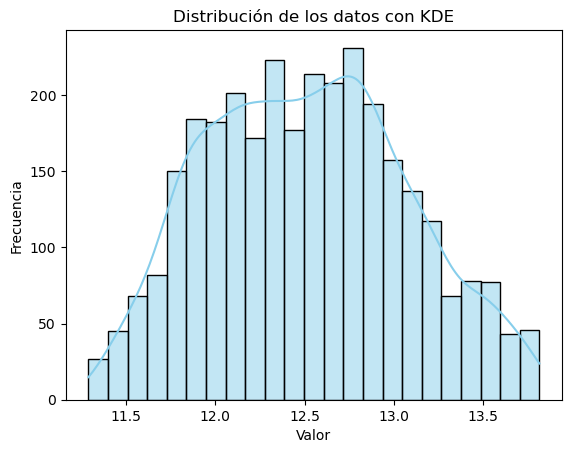

In [9]:
# Crear un histograma de los datos con KDE
sns.histplot(y_trainOLS, kde=True, color='skyblue', edgecolor='black')

# Agregar etiquetas y título
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.title('Distribución de los datos con KDE')

# Mostrar el histograma
plt.show()

¿Qué pasa si le elimino los outliers?

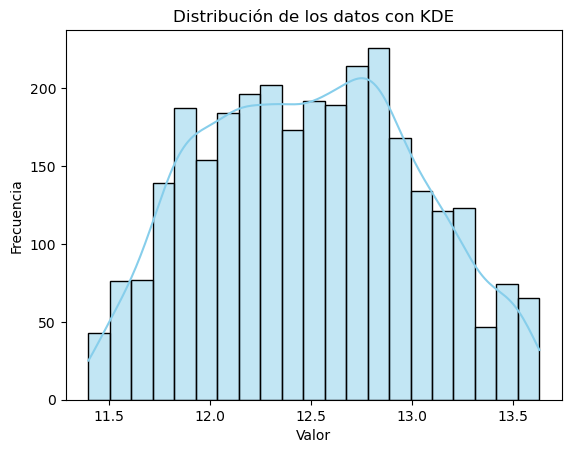

In [11]:
mean = y_trainOLS.mean()
std_dev = y_trainOLS.std()

# Definir los límites para identificar outliers
lower_limit = mean - 2 * std_dev
upper_limit = mean + 2 * std_dev

# Filtrar los datos para eliminar los outliers
y_trainOLS_filtered = y_trainOLS[(y_trainOLS >= lower_limit) & (y_trainOLS <= upper_limit)]

# Crear un histograma de los datos con KDE
sns.histplot(y_trainOLS_filtered, kde=True, color='skyblue', edgecolor='black')

# Agregar etiquetas y título
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.title('Distribución de los datos con KDE')

# Mostrar el histograma
plt.show()

No mejora en gran medida, me parece que antes se acercaba más a una distribución normal, por lo que no eliminaré datos por considerar que no hay outliers.

A continuación, elaboro el modelo. Vemos que los resultados son muy similares a los que encontró Carlos.

In [29]:
# Añadir una constante a X_trainOLS para estimar el intercepto
X_trainOLS = sm.add_constant(X_trainOLS)

# Crear el modelo de regresión lineal
ols = sm.OLS(y_trainOLS, X_trainOLS)

# Ajustar el modelo a los datos
resOLS = ols.fit()

# Imprimir el resumen del modelo
print(resOLS.summary())

                            OLS Regression Results                            
Dep. Variable:            Ln_total_pr   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     713.4
Date:                Thu, 08 Feb 2024   Prob (F-statistic):               0.00
Time:                        15:58:53   Log-Likelihood:                 712.48
No. Observations:                3081   AIC:                            -1359.
Df Residuals:                    3048   BIC:                            -1160.
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Ponemos **a prueba** el modelo con los **datos de testeo**.

In [30]:
X_testOLS = sm.add_constant(X_testOLS)  # Agregar una constante para el término de intercepción
y_pred_testOLS = resOLS.predict(X_testOLS)  # Predicciones del modelo para los datos de prueba

In [31]:
###Ojo que uso los datos de testeo
# Calcular el R^2
r2OLS = r2_score(y_testOLS, y_pred_testOLS)

# Calcular el MAE
maeOLS = mean_absolute_error(y_testOLS, y_pred_testOLS)

# Calcular el RMSE
rmseOLS = np.sqrt(mean_squared_error(y_testOLS, y_pred_testOLS))

# Calcular el RAE
raeOLS = maeOLS / abs(y_testOLS).mean()

# Calcular el RRSE
rrseOLS = rmseOLS / y_testOLS.std()

# Imprimir resultados
print("Coefficient of Determination (R2):", r2OLS)
print("Mean Absolute Error (MAE):", maeOLS)
print("Relative Absolute Error (RAE):", raeOLS)
print("Root Relative Squared Error (RRSE):", rrseOLS)
print("Root Mean Squared Error (RMSE):", rmseOLS)

Coefficient of Determination (R2): 0.8848420106419187
Mean Absolute Error (MAE): 0.13847767719336038
Relative Absolute Error (RAE): 0.011076586971280096
Root Relative Squared Error (RRSE): 0.33912921947862257
Root Mean Squared Error (RMSE): 0.18347096277291666


# 2. Red neuronal

## 2.1. Obtención y limpieza de datos

Cargamos las librerías necesarias.

In [6]:
from sklearn import preprocessing #para escalar/normalizar variables numéricas
import tensorflow as tf #Esta y las de abajo las necesitamos siempre para ANN y RF
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

## 2.2. Estandarización de los datos

De las variables de mi base de datos, debo hacer un **one-hot encoding** para las categóricas y una **estandarización para las numéricas**. 

Empiezo buscando aquellas que pueden ser categóricas: contaré los valores únicos en cada columna y consideraré a aquellas con un número relativamente bajo de valores únicos como categóricas.

In [10]:
# Contar los valores únicos en cada columna
unique_counts = X_ols.nunique()

# Filtrar las columnas con un número bajo de valores únicos (puedes ajustar este umbral según tu criterio)
categoricas = unique_counts[unique_counts < 5].index

categoricas

Index(['EPC_A_emision', 'EPC_B_emision', 'EPC_C_emision', 'EPC_D_emision',
       'EPC_E_emision', 'EPC_F_emision', 'EPC_G_emision', 'Muestra_2023',
       'Year_1982_2006', 'Year_After_2007', 'bool_aire_acondicionado',
       'bool_ascensor', 'bool_calefaccion', 'bool_piscina_comunitaria',
       'dum_mar_200m', 'grand_terr_20m2'],
      dtype='object')

He ido haciendo una revisión en Excel para diferenciar aquellas que ya están convertidas a un one-hot encoding (dummies) de aquellas que aún necesitan pasar por ese proceso. **Ninguna necesita pasar el proceso de one-hote encoding**.

In [15]:
OHE=X_ols[['EPC_A_emision', 'EPC_B_emision', 'EPC_C_emision', 'EPC_D_emision',
       'EPC_E_emision', 'EPC_F_emision', 'EPC_G_emision', 'Muestra_2023',
       'Year_1982_2006', 'Year_After_2007', 'bool_aire_acondicionado',
       'bool_ascensor', 'bool_calefaccion', 'bool_piscina_comunitaria',
       'dum_mar_200m', 'grand_terr_20m2']]

Ahora hago la **estandarización** sobre las X que son numéricas.

In [11]:
# Crear una lista con todas las columnas dummies
columnas_a_eliminar = list(OHE.columns)

# Eliminar las columnas dummies de X_ols para quedarme sólo con las numéricas
X2 = X_ols.drop(columns=columnas_a_eliminar)

In [12]:
#Estandarizamos los valores de X3
min_max_scaler = preprocessing.MinMaxScaler() #preprocessing es una función de la librearía 
                                              #sklearn, ya sabe lo que hacer
X3 = min_max_scaler.fit_transform(X2)

Si quiero ver información sobre X3 me encontraré lo siguiente...

In [13]:
X3.info()

AttributeError: 'numpy.ndarray' object has no attribute 'info'

X4 ya no es un dataframe, sino un array. Python los entiende de manera distinta. Es como si uno fuera un archivo XLSX y el otro un archivo CSV; es decir, contienen la misma información pero un formato distinto. Sin embargo, *keras* y *tensorflow* suelen preferir los arrays (son menos pesados); por tanto, vamos a convertir **OHE** para luego unir todos en un mismo objeto. 

Recuerden que tanto OHE como **X4** son las variables independientes de nuestro modelo: la primera tiene variables dummies o binarias (valores 0 y 1), mientras que X4 son las variables numéricas que ya hemos estandarizado.

In [16]:
# Convertir OHE a un array NumPy
OHE_array=OHE.values

# Concatenar X3, y OHE_array a lo largo del eje de las columnas (axis=1)
X_scale = np.concatenate((X3,OHE_array), axis=1)

Cuando elabore el modelo de redes neuronales, voy a necesitar saber cuántas variables independientes tengo (X), asi que para eso cuento la cantidad de columnas que tienen mi array *X_scale*.

In [17]:
X_scale.shape[1]

32

Por si acaso, también convierto las Y en array.

In [19]:
y2 = y_ols.values

In [20]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scale, y2, 
                                                    test_size=0.2, random_state=42)

## 2.3. Elaboración del modelo

In [21]:
model = Sequential([
    Dense(128, activation='relu', #Valor usado en la literatura
    input_shape=(32,)), #Noten que acá van la cantidad de X
    Dense(64, activation='relu'), #Valor usado en la literatura
    Dense(1)  #Queremos una sola salida
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(0.005), #Valor usado en la literatura
    loss='mean_squared_error', #Valor usado en la literatura
    metrics=['accuracy'] #Valor usado en la literatura
)

nnmodel = model.fit(X_train, y_train, epochs=1000, #Valor usado en la literatura
               callbacks=[EarlyStopping(monitor='val_loss', patience=500, restore_best_weights=True)], #Valores usados en la literatura
               batch_size=6, #Valor usado en la literatura
               verbose=False, #Sólo para que no imprima muchas cosas mientras procesa el modelo
               validation_split=0.3 #Valor usado en la literatura
              )

In [22]:
# Predicciones en el conjunto de testeo
y_predANN = model.predict(X_test)

# Coefficient of determination (R2)
r2ANN = r2_score(y_test, y_predANN)

# Mean Absolute Error (MAE)
maeANN = mean_absolute_error(y_test, y_predANN)

# Relative Absolute Error (RAE)
raeANN = np.sum(np.abs(y_predANN - y_test)) / np.sum(np.abs(np.mean(y_test) - y_test))

# Root Relative Squared Error (RRSE)
rrseANN = np.sqrt(np.sum((y_predANN - y_test) ** 2) / np.sum((np.mean(y_test) - y_test) ** 2))

# Root Mean Squared Error (RMSE)
rmseANN = np.sqrt(mean_squared_error(y_test, y_predANN))

# Imprimir resultados
print("Coefficient of Determination (R2):", r2ANN)
print("Mean Absolute Error (MAE):", maeANN)
print("Relative Absolute Error (RAE):", raeANN)
print("Root Relative Squared Error (RRSE):", rrseANN)
print("Root Mean Squared Error (RMSE):", rmseANN)

25/25 [==============================] - 0s 1ms/step
Coefficient of Determination (R2): 0.8799211779394784
Mean Absolute Error (MAE): 0.1426096845883721
Relative Absolute Error (RAE): 1049.0943549091419
Root Relative Squared Error (RRSE): 38.38393978916689
Root Mean Squared Error (RMSE): 0.1873499202865381


Guardamos.

In [23]:
import pickle

# Guardar el modelo
model.save("modelos/NN2-BCN4K")

# Guardar el historial
with open("modelos/NN2-BCN4K/history.pkl", "wb") as f:
    pickle.dump(nnmodel.history, f)

INFO:tensorflow:Assets written to: modelos/NN2-BCN4K\assets


INFO:tensorflow:Assets written to: modelos/NN2-BCN4K\assets


# 3. Random Forest

## 3.1. División de los datos

In [24]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_trainRF, X_testRF, y_trainRF, y_testRF = train_test_split(X_scale, y2, 
                                                    test_size=0.2, random_state=42)

## 3.2. Elaboración del modelo

In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Crear el modelo de Random Forest
rf_model = RandomForestRegressor(n_estimators=100, #Literatura indica que esto es prueba y error 
                                 random_state=42) #Puede ser cualquier número

# Entrenar el modelo
rf_model.fit(X_trainRF, y_trainRF)

# Predecir sobre los datos de prueba
y_predRF = rf_model.predict(X_testRF)

In [26]:
#Calcular coeficiente de determinación
r2RF = r2_score(y_testRF, y_predRF)

# Calcular MAE
maeRF = mean_absolute_error(y_testRF, y_predRF)

# Calcular RAE
raeRF = maeRF / np.mean(np.abs(y_testRF))

# Calcular RMSE
rmseRF = np.sqrt(mean_squared_error(y_testRF, y_predRF))

# Calcular RRSE
rrseRF = rmseRF / np.std(y_test)

# Imprimir resultados
print("Coefficient of Determination (R2):", r2RF)
print("Mean Absolute Error (MAE):", maeRF)
print("Relative Absolute Error (RAE):", raeRF)
print("Root Relative Squared Error (RRSE):", rrseRF)
print("Root Mean Squared Error (RMSE):", rmseRF)

Coefficient of Determination (R2): 0.887514129651001
Mean Absolute Error (MAE): 0.13459569435489374
Relative Absolute Error (RAE): 0.010766073960065648
Root Relative Squared Error (RRSE): 0.3353891327234665
Root Mean Squared Error (RMSE): 0.18132984472663147


Guardamos.

In [35]:
import joblib
import json

# Guardar el modelo de Random Forest
joblib.dump(rf_model, 'modelos/RF1-BCN4K.pkl')

# 4. Comparación de modelos

In [32]:
# Crear un diccionario con los datos
data = {
    'Modelo': ['OLS', 'ANN', 'RF'],
    'R2': [r2OLS, r2ANN, r2RF],
    'MAE': [maeOLS, maeANN, maeRF],
    'RAE': [raeOLS, raeANN, raeRF],
    'RRSE': [rrseOLS, rrseANN, rrseRF],
    'RMSE': [rmseOLS, rmseANN, rmseRF ]
}

# Crear un DataFrame con los datos
comparacion2 = pd.DataFrame(data)

# Mostrar la tabla
print(comparacion2)

  Modelo        R2       MAE          RAE       RRSE      RMSE
0    OLS  0.884842  0.138478     0.011077   0.339129  0.183471
1    ANN  0.879921  0.142610  1049.094355  38.383940  0.187350
2     RF  0.887514  0.134596     0.010766   0.335389  0.181330


El RF es ligeramente mejor que el OLS.

Los chicos pueden intentar mejorar el modelo OLS inicial, para que no considere sólo las columnas que Carlos indicó.